In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import HTML

In [21]:
df = pd.read_csv('rus2.csv')
df.head()

,trip_status,ride_hailing_app,trip_time,total_time,wait_time,trip_type,surge_multiplier,vehicle_make,driver_gender,trip_map_image_url,price_usd,distance_kms,temperature_value,humidity,wind_speed,cloudness,weather_main,weather_desc,precipitation
0,Completed,Uber,0:21:33,29,7,uberX,1.0,Ford,1,Saint Petersburg,5.17,9.29,12,0.69,4.81,0.78,partly-cloudy-day,Mostly Cloudy,none
1,Completed,Uber,0:19:27,26,6,uberX,1.0,Hyundai,1,Saint Petersburg,4.97,9.93,10,0.70,6.53,0.66,partly-cloudy-day,Mostly Cloudy,none
2,Completed,Uber,1:06:53,83,16,uberX,1.0,Renault,1,Saint Petersburg,13.01,18.01,14,0.61,5.25,0.86,partly-cloudy-day,Mostly Cloudy,none
3,Completed,Uber,0:13:37,20,6,uberBLACK,2.9,Mercedes-Benz,1,Saint Petersburg,25.99,5.10,3,0.84,0.87,0.56,partly-cloudy-night,Partly Cloudy,none
4,Completed,Uber,0:38:54,49,10,uberX,1.4,Hyundai,1,Saint Petersburg,13.43,21.92,3,0.90,1.61,0.31,partly-cloudy-night,Partly Cloudy,none


In [24]:
df['price_usd'].describe()

count    678.000000
mean       5.061593
std        4.251843
min        0.840000
25%        2.760000
50%        3.735000
75%        5.670000
max       33.550000
Name: price_usd, dtype: float64

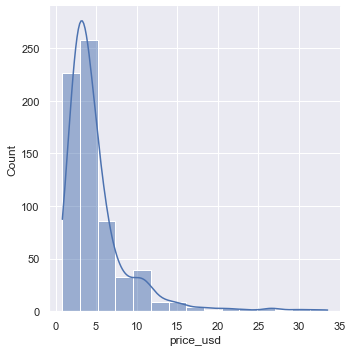

In [53]:
sns.displot(df['price_usd'], bins=15, kde=True).set_titles('Price histogram')

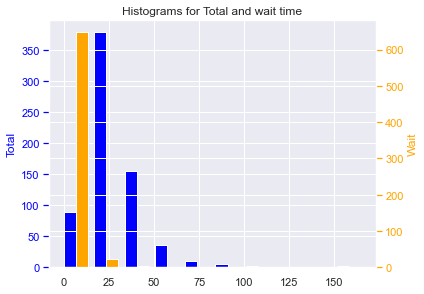

In [55]:
#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([df['total_time'], df['wait_time']])
n, bins, patches = ax1.hist([df['total_time'], df['wait_time']])
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color = 'blue')
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color='orange')

#finishes the plot
ax1.set_ylabel("Total", color='blue')
ax2.set_ylabel("Wait", color='orange')
ax1.tick_params('y', colors='blue')
ax2.tick_params('y', colors='orange')
plt.tight_layout()
plt.title('Histograms for Total and wait time')

plt.show()

Text(0.5, 1.0, 'Total time on price')

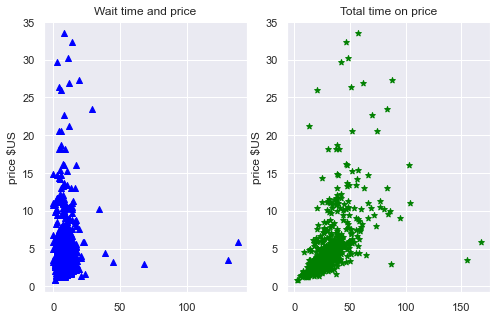

In [41]:
plt.figure(figsize=(8, 5))
ax = plt.subplot(121)
plt.scatter(df['wait_time'], df['price_usd'], color = 'blue', marker='^')
plt.ylabel('price $US', multialignment='center')
plt.title('Wait time and price')
ax = plt.subplot(122)
plt.scatter(df['total_time'], df['price_usd'], color = 'green', marker='*')
plt.ylabel('price $US', multialignment='center')
plt.title('Total time and price')

Text(0.5, 1.0, 'Price by city zone')

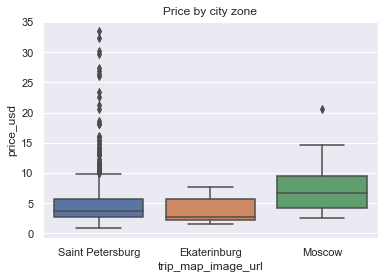

In [56]:
sns.boxplot(x="trip_map_image_url", y="price_usd", data=df).set_title("Price by city zone")

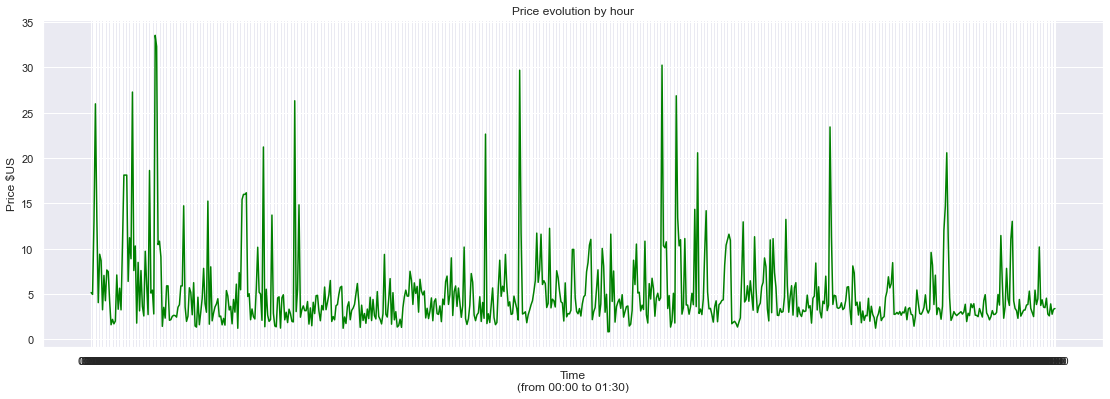

In [58]:
import dateutil
from datetime import datetime
import matplotlib.dates as md

time = pd.date_range("00:00", "01:30", freq="8S")
time = time.astype('str')

dates = [i.split(' ')[1] for i in time]
dates.insert(1,'00:00:04')
dates.insert(4,'00:00:20')

plt.figure(figsize=(19, 6))
ax=plt.gca()
# ax.set_xticks(dates)

xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates, df['price_usd'], color='green')
plt.title('Price evolution by hour')
plt.xlabel('Time\n(from 00:00 to 01:30)')
plt.ylabel('Price $US', multialignment='center')
plt.show()

Text(0.5, 1.0, 'Car brands count')

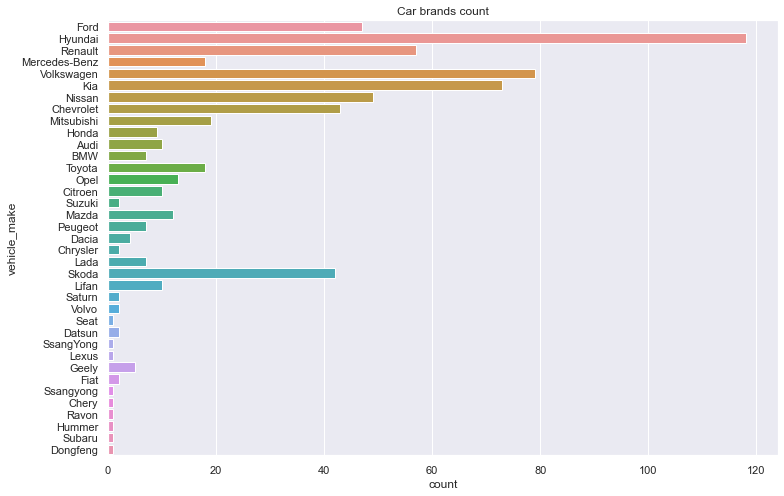

In [14]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(y="vehicle_make", data=df).set_title("Car brands count")

Text(0.5, 1.0, 'Trip type count')

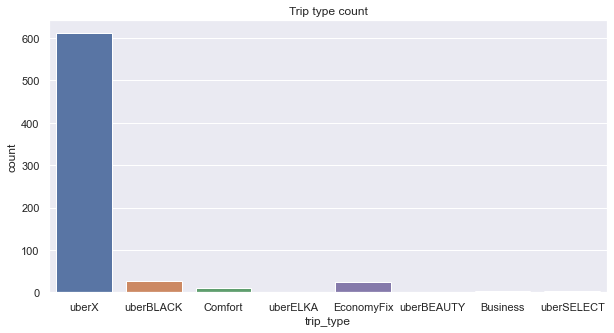

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="trip_type", data=df).set_title("Trip type count")

Text(0.5, 1.0, 'Trip time by precipitation condition')

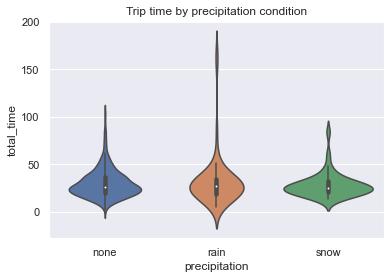

In [25]:
sns.violinplot(x="precipitation", y="total_time", data=df).set_title("Trip time by precipitation condition")

Text(0.5, 1.0, 'Wind speed on price')

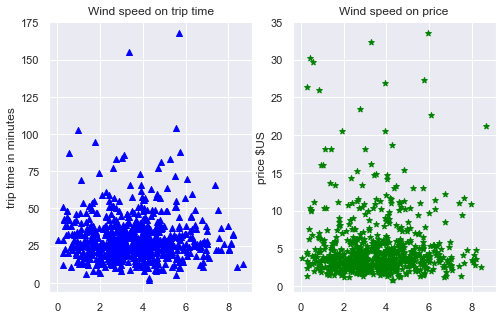

In [35]:
plt.figure(figsize=(8, 5))
ax = plt.subplot(121)
plt.scatter(df['wind_speed'], df['total_time'], color = 'blue', marker='^')
plt.ylabel('trip time in minutes', multialignment='center')
plt.title('Wind speed on trip time')
ax = plt.subplot(122)
plt.scatter(df['wind_speed'], df['price_usd'], color = 'green', marker='*')
plt.ylabel('price $US', multialignment='center')
plt.title('Wind speed on price')